# Predicting Legendary Status
- Try out different models and see which ones have the best accuracy scores out of the box.
- Pick one or two of the best performers and tune the models to improve accuracy.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Prevent warnings from appearing
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Change the amount of rows shown in printed dataframes
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
# Read in pokedex csv
pokedex = pd.read_csv('../data/pokedex_merged.csv')
pokedex = pokedex.where(pd.notnull(pokedex), None)

## Models to Build and Test
1. Decision Tree 
2. Gaussian Naïve Bayes
3. K-nearest Neighbors
4. Logistic Regression
5. Neural Network
6. Random Forest
7. Support Vector Machines

In [28]:
# Variables for train/test split function
tst_size = 0.3
random_seed = [321, 1994, 1997, 6006, 9001, 10352, 78091, 12343, 12903, 320991]
dec_tree_acc = 0
dec_tree_f1 = 0
gauss_acc = 0
gauss_f1 = 0
knn_acc = 0
knn_f1 = 0
logreg_acc = 0
logreg_f1 = 0
nn_acc = 0
nn_f1 = 0
rand_forest_acc = 0
rand_forest_f1 = 0
svc_acc = 0
svc_f1 = 0

# Separate data by response and variable data
X = pokedex[['total', 'average', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'catch_rate']]
y = pokedex['legendary']

for seed in random_seed:
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=tst_size, 
                                                        random_state=seed, 
                                                        stratify=y)
    
    # Instantiate models, fit them with training set, and predict values with the testing set
    dec_tree_pred = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
    gauss_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
    knn_pred = KNeighborsClassifier().fit(X_train, y_train).predict(X_test)
    logreg_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
    nn_pred = MLPClassifier().fit(X_train, y_train).predict(X_test)
    rand_forest_pred = RandomForestClassifier().fit(X_train, y_train).predict(X_test)
    svc_pred = SVC().fit(X_train, y_train).predict(X_test)
    
    dec_tree_acc += accuracy_score(y_test, dec_tree_pred)
    dec_tree_f1 += f1_score(y_test, dec_tree_pred)
    
    gauss_acc += accuracy_score(y_test, gauss_pred)
    gauss_f1 += f1_score(y_test, gauss_pred)
    
    knn_acc += accuracy_score(y_test, knn_pred)
    knn_f1 += f1_score(y_test, knn_pred)
    
    logreg_acc += accuracy_score(y_test, logreg_pred)
    logreg_f1 += f1_score(y_test, logreg_pred)
    
    nn_acc += accuracy_score(y_test, nn_pred)
    nn_f1 += f1_score(y_test, nn_pred)
    
    rand_forest_acc += accuracy_score(y_test, rand_forest_pred)
    rand_forest_f1 += f1_score(y_test, rand_forest_pred)
    
    svc_acc += accuracy_score(y_test, svc_pred)
    svc_f1 += f1_score(y_test, svc_pred)

In [29]:
dec_tree_acc_avg = round(dec_tree_acc * 10, 2)
dec_tree_f1_avg = round(dec_tree_f1 * 10, 2)
print('The accuracy score we have achieved using Decision Tree is: ' + str(dec_tree_acc_avg) + '%')
print('The F1-score we have achieved using Decision Tree is: ' + str(dec_tree_f1_avg) + '%')
print('\n')

gauss_acc_avg = round(gauss_acc * 10, 2)
gauss_f1_avg = round(gauss_f1 * 10, 2)
print('The accuracy score we have achieved using Gaussian Naive Bayes is: ' + str(gauss_acc_avg) + '%')
print('The F1-score we have achieved using Gaussian Naive Bayes is: ' + str(gauss_f1_avg) + '%')
print('\n')

knn_acc_avg = round(knn_acc * 10, 2)
knn_f1_avg = round(knn_f1 * 10, 2)
print('The accuracy score we have achieved using K Nearest Neighbors is: ' + str(knn_acc_avg) + '%')
print('The F1-score we have achieved using K Nearest Neighbors is: ' + str(knn_f1_avg) + '%')
print('\n')

logreg_acc_avg = round(logreg_acc * 10, 2)
logreg_f1_avg = round(logreg_f1 * 10, 2)
print('The accuracy score we have achieved using Logistic Regression is: ' + str(logreg_acc_avg) + '%')
print('The F1-score we have achieved using Logistic Regression is: ' + str(logreg_f1_avg) + '%')
print('\n')

nn_acc_avg = round(nn_acc * 10, 2)
nn_f1_avg = round(nn_f1 * 10, 2)
print('The accuracy score we have achieved using Neural Network is: ' + str(nn_acc_avg) + '%')
print('The F1-score we have achieved using Neural Network is: ' + str(nn_f1_avg) + '%')
print('\n')

rand_forest_acc_avg = round(rand_forest_acc * 10, 2)
rand_forest_f1_avg = round(rand_forest_f1 * 10, 2)
print('The accuracy score we have achieved using Random Forest is: ' + str(rand_forest_acc_avg) + '%')
print('The F1-score we have achieved using Random Forest is: ' + str(rand_forest_f1_avg) + '%')
print('\n')

svc_acc_avg = round(svc_acc * 10, 2)
svc_f1_avg = round(svc_f1 * 10, 2)
print('The accuracy score we have achieved using Support Vector Classification is: ' + str(svc_acc_avg) + '%')
print('The F1-score we have achieved using Support Vector Classification is: ' + str(svc_f1_avg) + '%')
print('\n')

The accuracy score we have achieved using Decision Tree is: 97.65%
The F1-score we have achieved using Decision Tree is: 89.54%


The accuracy score we have achieved using Gaussian Naive Bayes is: 90.31%
The F1-score we have achieved using Gaussian Naive Bayes is: 67.36%


The accuracy score we have achieved using K Nearest Neighbors is: 96.6%
The F1-score we have achieved using K Nearest Neighbors is: 83.61%


The accuracy score we have achieved using Logistic Regression is: 96.43%
The F1-score we have achieved using Logistic Regression is: 82.84%


The accuracy score we have achieved using Neural Network is: 95.54%
The F1-score we have achieved using Neural Network is: 78.72%


The accuracy score we have achieved using Random Forest is: 97.96%
The F1-score we have achieved using Random Forest is: 90.74%


The accuracy score we have achieved using Support Vector Classification is: 96.8%
The F1-score we have achieved using Support Vector Classification is: 84.98%




In [30]:
pokedex_short = pokedex[['name', 'legendary']].reset_index().rename(columns={'index':'join_id'})
rand_forest_df = X_test.reset_index().rename(columns={'index':'join_id'})
rand_forest_df['legendary_predictions'] = pd.Series(rand_forest_pred)
pokedex_merge = rand_forest_df.join(pokedex_short, how='left', on='join_id', lsuffix='_original', rsuffix='_pred')
pokedex_merge[pokedex_merge['legendary'] != pokedex_merge['legendary_predictions']]

,join_id_original,total,average,hp,attack,defense,sp_atk,sp_def,speed,catch_rate,legendary_predictions,join_id_pred,name,legendary
4,955,600,100.00,88,120,75,100,75,142,45,True,955,Dragapult,False
59,853,200,33.33,43,29,31,29,31,37,45,False,853,Cosmog,True
110,871,540,90.00,73,73,73,127,73,121,45,False,871,Naganadel,True
121,412,600,100.00,95,135,80,110,80,100,45,True,412,Salamence,False
192,688,600,100.00,92,105,90,125,90,98,45,True,688,Hydreigon,False
211,616,567,94.50,75,140,65,112,65,110,45,True,616,Archeops,False
215,961,385,64.17,60,90,60,53,50,72,3,False,961,Kubfu,True
243,488,600,100.00,108,130,95,80,85,102,45,True,488,Garchomp,False
266,761,600,100.00,90,100,70,110,150,80,45,True,761,Goodra,False
289,762,600,100.00,80,100,100,110,150,60,45,True,762,Goodra Hisuian Goodra,False


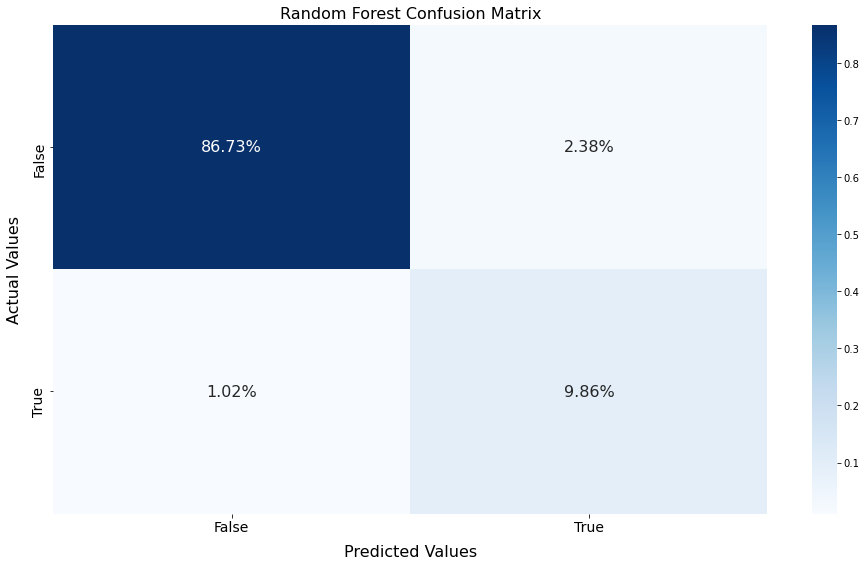

In [31]:
plt.figure(figsize=(16,9))
fontsize=16

cf_matrix = confusion_matrix(y_test, rand_forest_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), 
                 annot=True,
                 annot_kws={"size": fontsize},
                 fmt='.2%', 
                 cmap='Blues')

ax.set_title('Random Forest Confusion Matrix', fontsize=fontsize);
ax.set_xlabel('Predicted Values', fontsize=fontsize, labelpad=10)
ax.set_ylabel('Actual Values', fontsize=fontsize, labelpad=10);

ax.xaxis.set_ticklabels(['False','True'], fontsize=fontsize-2)
ax.yaxis.set_ticklabels(['False','True'], fontsize=fontsize-2);

### Results from Different Models
#### Conclusion:
- Random Forest is consistenly the best performing model in predicting legendary status across multiple seeds. Will tune the hyperparameters of the Random Forest model to improve accuracy.

## Model Tuning
### Will tune the following hyperparameters for the Random Forest model:
- Number of Decision Trees in the Forest (n_estimators) = Increase number of trees to make sure all features are covered by model and reduce model error.
- Criteria to Split On (criterion) = Try different functions to test different node splits.
- Max Depth of the Individual Trees (max_depth) = Deeper trees mean more information about the data is taken into account possibly leading to better predicitons.
- Number of Random Features to Consider at Each Split (max_features) = Test different number of features at each split to see which results in best results.
- Percentage of the Training Data Used to Train Each Tree (bootstrap, max_samples) = Manipulate how much of the data is used to train each tree.

In [32]:
# Create the random grid
random_grid = {'n_estimators': [100, 500, 1000, 2000, 5000],
               'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [100, 200, 300, 400, 500, None],
               'max_features': ['auto', 'sqrt', 'log2', None],
               'bootstrap': [True], 
               'max_samples': [100, 200, 300, None]}

In [57]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=1994, 
                                                    stratify=y)

In [58]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter=200, 
                               cv=3, 
                               verbose=2, 
                               random_state=seed, 
                               n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.7min finished


In [59]:
rf_random.best_params_

{'n_estimators': 100,
 'max_samples': 300,
 'max_features': None,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [60]:
rf_pred = RandomForestClassifier().fit(X_train, y_train).predict(X_test)
rand_forest_acc = round(accuracy_score(y_test, rf_pred) * 100, 2)
rand_forest_f1 = round(f1_score(y_test, rf_pred) * 100, 2)
print('The accuracy score we have achieved using Random Forest is: ' + str(rand_forest_acc) + '%')
print('The F1-score we have achieved using Random Forest is: ' + str(rand_forest_f1) + '%')
print('\n')

The accuracy score we have achieved using Random Forest is: 96.6%
The F1-score we have achieved using Random Forest is: 85.29%




In [61]:
rf_best_params_pred = RandomForestClassifier(**rf_random.best_params_).fit(X_train, y_train).predict(X_test)
rand_forest_acc = round(accuracy_score(y_test, rf_best_params_pred) * 100, 2)
rand_forest_f1 = round(f1_score(y_test, rf_best_params_pred) * 100, 2)
print('The accuracy score we have achieved using Random Forest is: ' + str(rand_forest_acc) + '%')
print('The F1-score we have achieved using Random Forest is: ' + str(rand_forest_f1) + '%')
print('\n')

The accuracy score we have achieved using Random Forest is: 96.6%
The F1-score we have achieved using Random Forest is: 85.71%


